# 02 Regression

- Linear Regression
- Non-linear Regression
- Model evaluation methods

# Linear Regression

<p align="center"> 
<img src="../images/02_Regression/types.png", width=800, height=600>
</p>

## Import Packages

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## Download Data

In [7]:
!wget -O ../data/FuelConsumption.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv

--2019-09-14 13:47:10--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.193
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.193|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 72629 (71K) [text/csv]
Saving to: ‘../data/FuelConsumption.csv’

../data/FuelConsump 100%[===================>]  70.93K   173KB/s    in 0.4s    

2019-09-14 13:47:12 (173 KB/s) - ‘../data/FuelConsumption.csv’ saved [72629/72629]



## Understand Data

<p align="center"> 
<img src="../images/02_Regression/predict_contious_values.png", width=800, height=600>
</p>

>FuelConsumption.csv contains model-specific fuel consumption ratings and estimated carbon dioxide emissions for new light-duty vehicles for retail sale in Canada. Dataset source
- **MODELYEAR** e.g. 2014
- **MAKE** e.g. Acura
- **MODEL** e.g. ILX
- **VEHICLE CLASS** e.g. SUV
- **ENGINE SIZE** e.g. 4.7
- **CYLINDERS**** e.g 6
- **TRANSMISSION** e.g. A6
- **FUEL CONSUMPTION in CITY(L/100 km)** e.g. 9.9
- **FUEL CONSUMPTION in HWY (L/100 km)** e.g. 8.9
- **FUEL CONSUMPTION COMB (L/100 km)** e.g. 9.2
- **CO2 EMISSIONS (g/km)** e.g. 182 --> low --> 0

## Read Data

In [8]:
df = pd.read_csv("../data/FuelConsumption.csv")
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


## Explore Data 

In [10]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [11]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
5,3.5,6,10.0,230
6,3.5,6,10.1,232
7,3.7,6,11.1,255
8,3.7,6,11.6,267


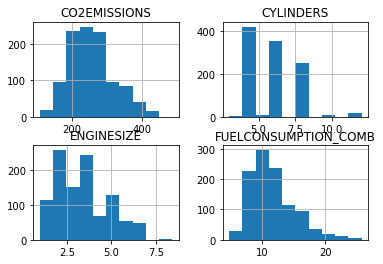

In [12]:
viz = cdf[['CYLINDERS','ENGINESIZE','CO2EMISSIONS','FUELCONSUMPTION_COMB']]
viz.hist()
plt.show()

>plot each of feature vs the Emission, to see how linear is their relation

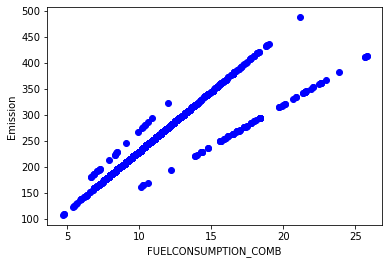

In [13]:
plt.scatter(cdf.FUELCONSUMPTION_COMB, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel("Emission")
plt.show()

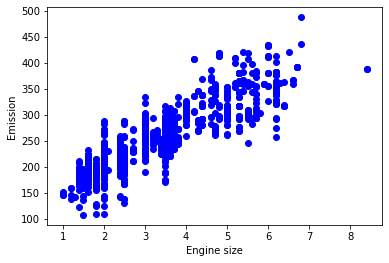

In [14]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

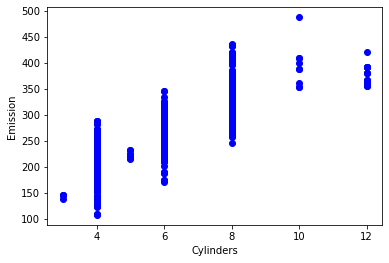

In [15]:
plt.scatter(cdf.CYLINDERS, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("Cylinders")
plt.ylabel("Emission")
plt.show()

## Create train and test dataset

In [16]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

## Simple Linear Regression 

<p align="center"> 
<img src="../images/02_Regression/simple.png", width=800, height=600>
</p>

<p align="center"> 
<img src="../images/02_Regression/linear_regression_model_representation.png", width=800, height=600>
</p>

<p align="center"> 
<img src="../images/02_Regression/how_linear_regression_works.png", width=800, height=600>
</p>

>Linear Regression fits a linear model with coefficients B = (B1, ..., Bn) to minimize the 'residual sum of squares' between the independent x in the dataset, and the dependent y by the linear approximation

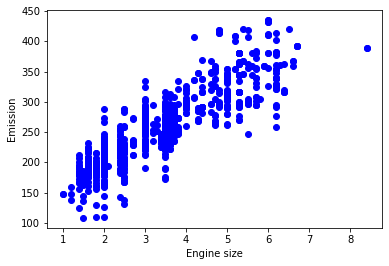

In [17]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

## Model Data

<p align="center"> 
<img src="../images/02_Regression/estimate_parameters.png", width=800, height=600>
</p>

In [18]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit (train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[38.51331144]]
Intercept:  [127.04552201]


- Coefficient and Intercept in the simple linear regression, are the parameters of the fit line. 
- sklearn can estimate parameters directly from the data.

## Plot Outputs

Text(0, 0.5, 'Emission')

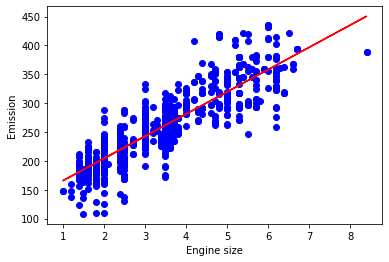

In [19]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("Engine size")
plt.ylabel("Emission")

<p align="center"> 
<img src="../images/02_Regression/prediction_with_linear_regression.png", width=800, height=600>
</p>

## Evaluate Model

<p align="center"> 
<img src="../images/02_Regression/how_to_find_best_fit.png", width=800, height=600>
</p>

>compare the actual values and predicted values to calculate the accuracy of a regression model.

### Evaluation metrics
>Mean Absolute Error
- Mean absolute error is the mean of the absolute value of the errors. 
- It is the easiest of the metrics to understand since it’s just average error.

>Mean Squared Error (MSE) 
- Mean Squared Error (MSE) is the mean of the squared error.
- It is used to calculate the accuracy of our model based on the test set.
- the focus is geared more towards large errors due to the squared term exponentially increasing larger errors in comparison to smaller ones.

>Root Mean Squared Error (RMSE). 
- R-squared is not error, but is a popular metric for accuracy of your model. 
- It represents how close the data are to the fitted regression line. 
- The higher the R-squared, the better the model fits your data.
- Best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse).

In [28]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])
test_y_ = regr.predict(test_x)

print(f"Mean absolute error: {np.mean(np.absolute(test_y_ - test_y)):.2f}")
print(f"Residual sum of squares (MSE): {np.mean((test_y_ - test_y) ** 2):.2f}")
print(f"R2-score: {r2_score(test_y_ , test_y):.2f}")

Mean absolute error: 23.66
Residual sum of squares (MSE): 966.12
R2-score: 0.64


# Multiple Linear Regression

<p align="center"> 
<img src="../images/02_Regression/multiple.png", width=800, height=600>
</p>

<p align="center"> 
<img src="../images/02_Regression/multiple_examples.png", width=800, height=600>
</p>

<p align="center"> 
<img src="../images/02_Regression/predict_with_multiple.png", width=800, height=600>
</p>

<p align="center"> 
<img src="../images/02_Regression/mse_expose_errors.png", width=800, height=600>
</p>

<p align="center"> 
<img src="../images/02_Regression/estimate_multiple_parameters.png", width=800, height=600>
</p>

<p align="center"> 
<img src="../images/02_Regression/make_predictions_with_multiple.png", width=800, height=600>
</p>

# Non-linear Regression

<p align="center"> 
<img src="../images/02_Regression/use_non_linear.png", width=800, height=600>
</p>

<p align="center"> 
<img src="../images/02_Regression/exponential.png", width=800, height=600>
</p>

>If the data shows a curvy trend, then linear regression will not produce very accurate results when compared to a non-linear regression
- linear regression presumes that the data is linear. 
- fit a non-linear model to the datapoints corrensponding to China's GDP from 1960 to 2014.

### Linear Regression

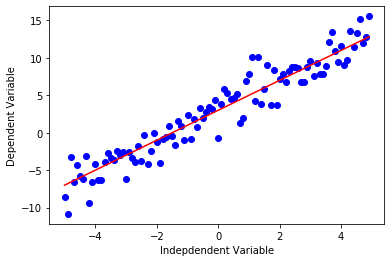

In [2]:
x = np.arange(-5.0, 5.0, 0.1)

##You can adjust the slope and intercept to verify the changes in the graph
y = 2*(x) + 3
y_noise = 2 * np.random.normal(size=x.size)
ydata = y + y_noise
#plt.figure(figsize=(8,6))
plt.plot(x, ydata,  'bo')
plt.plot(x,y, 'r') 
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.show()

<p align="center"> 
<img src="../images/02_Regression/polynomial_relationship.png", width=800, height=600>
</p>

### Cubic

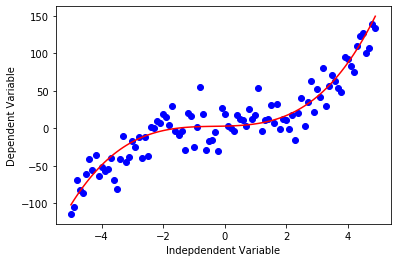

In [3]:
x = np.arange(-5.0, 5.0, 0.1)

##You can adjust the slope and intercept to verify the changes in the graph
y = 1*(x**3) + 1*(x**2) + 1*x + 3
y_noise = 20 * np.random.normal(size=x.size)
ydata = y + y_noise
plt.plot(x, ydata,  'bo')
plt.plot(x,y, 'r') 
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.show()

### Quadratic

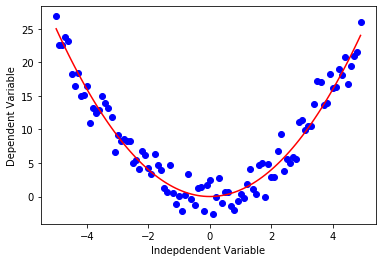

In [4]:
x = np.arange(-5.0, 5.0, 0.1)

##You can adjust the slope and intercept to verify the changes in the graph

y = np.power(x,2)
y_noise = 2 * np.random.normal(size=x.size)
ydata = y + y_noise
plt.plot(x, ydata,  'bo')
plt.plot(x,y, 'r') 
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.show()

### Exponential

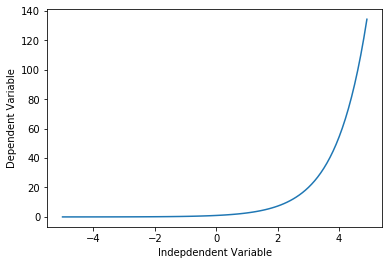

In [5]:
X = np.arange(-5.0, 5.0, 0.1)

##You can adjust the slope and intercept to verify the changes in the graph

Y= np.exp(X)

plt.plot(X,Y) 
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.show()

### Logarithmic

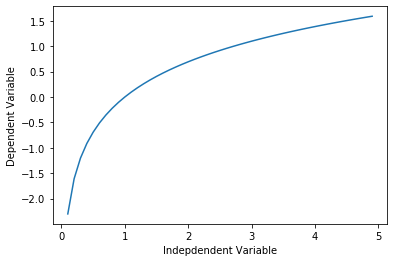

In [8]:
X = np.arange(-5.0, 5.0, 0.1)

Y = np.log(X)

plt.plot(X,Y) 
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.show()

### Sigmoidal/Logistic

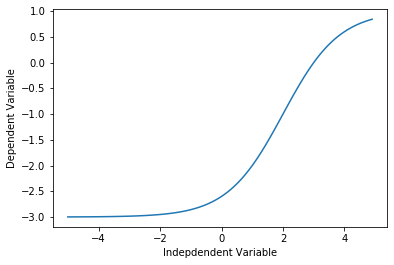

In [9]:
X = np.arange(-5.0, 5.0, 0.1)


Y = 1-4/(1+np.power(3, X-2))

plt.plot(X,Y) 
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.show()

<p align="center"> 
<img src="../images/02_Regression/polynomial_regression.png", width=800, height=600>
</p>

<p align="center"> 
<img src="../images/02_Regression/non_linear_regression.png", width=800, height=600>
</p>

## China's GDP from 1960 to 2014
>fit a non-linear model to the datapoints corrensponding to China's GDP from 1960 to 2014.
- dataset with two columns
- first, a year between 1960 and 2014
- second, China's corresponding annual gross domestic income in US dollars for that year.

In [10]:
#downloading dataset
!wget -nv -O ../data/china_gdp.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/china_gdp.csv

2019-09-14 19:05:43 URL:https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/china_gdp.csv [1218/1218] -> "../data/china_gdp.csv" [1]


In [11]:
df = pd.read_csv("../data/china_gdp.csv")
df.head(10)

,Year,Value
0,1960,5.918412e+10
1,1961,4.955705e+10
2,1962,4.668518e+10
3,1963,5.009730e+10
4,1964,5.906225e+10
5,1965,6.970915e+10
6,1966,7.587943e+10
7,1967,7.205703e+10
8,1968,6.999350e+10
9,1969,7.871882e+10


## Plot Data

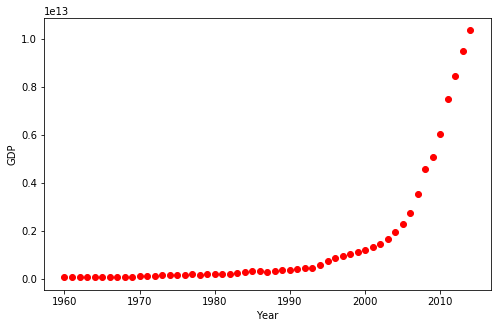

In [12]:
plt.figure(figsize=(8,5))
x_data, y_data = (df["Year"].values, df["Value"].values)
plt.plot(x_data, y_data, 'ro')
plt.ylabel('GDP')
plt.xlabel('Year')
plt.show()

## Choose model

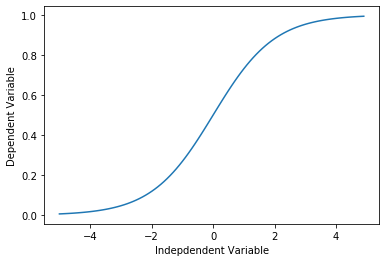

In [13]:
X = np.arange(-5.0, 5.0, 0.1)
Y = 1.0 / (1.0 + np.exp(-X))

plt.plot(X,Y) 
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.show()

## Build Mode

In [14]:
def sigmoid(x, Beta_1, Beta_2):
     y = 1 / (1 + np.exp(-Beta_1*(x-Beta_2)))
     return y

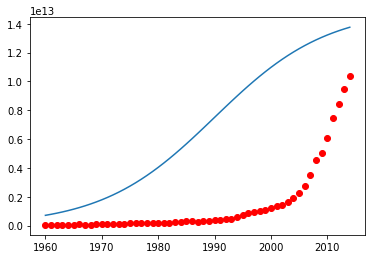

In [15]:
beta_1 = 0.10
beta_2 = 1990.0

#logistic function
Y_pred = sigmoid(x_data, beta_1 , beta_2)

#plot initial prediction against datapoints
plt.plot(x_data, Y_pred*15000000000000.)
plt.plot(x_data, y_data, 'ro')

In [16]:
# normalize our data
xdata =x_data/max(x_data)
ydata =y_data/max(y_data)

In [20]:
from scipy.optimize import curve_fit
popt, pcov = curve_fit(sigmoid, xdata, ydata)
#print the final parameters
print(f" beta_1 = {popt[0]:.6f}, beta_2 = {popt[1]:.6f}")

 beta_1 = 690.453017, beta_2 = 0.997207


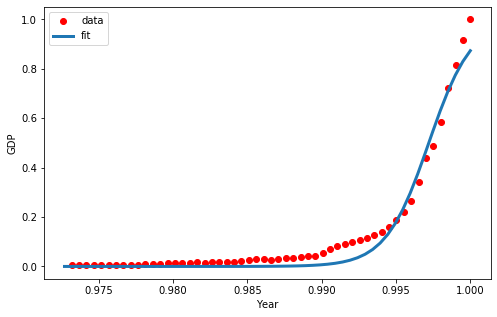

In [21]:
x = np.linspace(1960, 2015, 55)
x = x/max(x)
plt.figure(figsize=(8,5))
y = sigmoid(x, *popt)
plt.plot(xdata, ydata, 'ro', label='data')
plt.plot(x,y, linewidth=3.0, label='fit')
plt.legend(loc='best')
plt.ylabel('GDP')
plt.xlabel('Year')
plt.show()

## Calculate Accuracy

In [22]:
# split data into train/test
msk = np.random.rand(len(df)) < 0.8
train_x = xdata[msk]
test_x = xdata[~msk]
train_y = ydata[msk]
test_y = ydata[~msk]

In [23]:
# build the model using train set
popt, pcov = curve_fit(sigmoid, train_x, train_y)

In [24]:
# predict using test set
y_hat = sigmoid(test_x, *popt)

In [26]:
# evaluation
print(f"Mean absolute error: {np.mean(np.absolute(y_hat - test_y)):.2f}")
print(f"Residual sum of squares (MSE): {np.mean((y_hat - test_y) ** 2):.2f}")
from sklearn.metrics import r2_score
print(f"R2-score: {r2_score(y_hat , test_y):.2f}")

Mean absolute error: 0.03
Residual sum of squares (MSE): 0.00
R2-score: -11.15


<p align="center"> 
<img src="../images/02_Regression/linear_vs_non_linear.png", width=800, height=600>
</p>

# Model evaluation methods

<p align="center"> 
<img src="../images/02_Regression/evaluation_apporaches.png", width=800, height=600>
</p>

<p align="center"> 
<img src="../images/02_Regression/approach_for_accurate_results.png", width=800, height=600>
</p>

<p align="center"> 
<img src="../images/02_Regression/calculate_accuracy.png", width=800, height=600>
</p>

<p align="center"> 
<img src="../images/02_Regression/train_test_same_dataset.png", width=800, height=600>
</p>

<p align="center"> 
<img src="../images/02_Regression/training_out_of_sample_accuracy.png", width=800, height=600>
</p>

<p align="center"> 
<img src="../images/02_Regression/train_test_split.png", width=800, height=600>
</p>

<p align="center"> 
<img src="../images/02_Regression/train_test_split_vs_train_test_same_dataset.png", width=800, height=600>
</p>

<p align="center"> 
<img src="../images/02_Regression/k_fold_cross_validation.png", width=800, height=600>
</p>

## Evaluation Metrics

<p align="center"> 
<img src="../images/02_Regression/error.png", width=800, height=600>
</p>

<p align="center"> 
<img src="../images/02_Regression/metrics.png", width=800, height=600>
</p>